# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
df = pd.read_csv('./data/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

In [13]:
monthly_count= df['count'].resample('ME').mean()
monthly_count.head()

datetime
2011-01-31     54.645012
2011-02-28     73.641256
2011-03-31     86.849776
2011-04-30    111.026374
2011-05-31    174.809211
Freq: ME, Name: count, dtype: float64

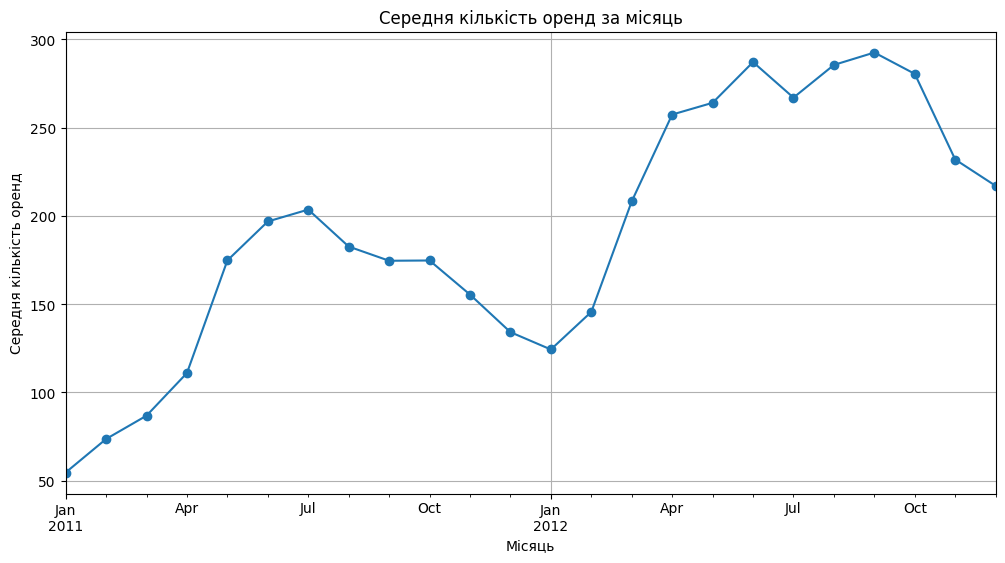

In [14]:
# with Pandas
monthly_count.plot(
    marker='o',
    figsize=(12, 6),
    title='Середня кількість оренд за місяць',
    xlabel='Місяць',
    ylabel='Середня кількість оренд',
    grid=True
)
plt.show()

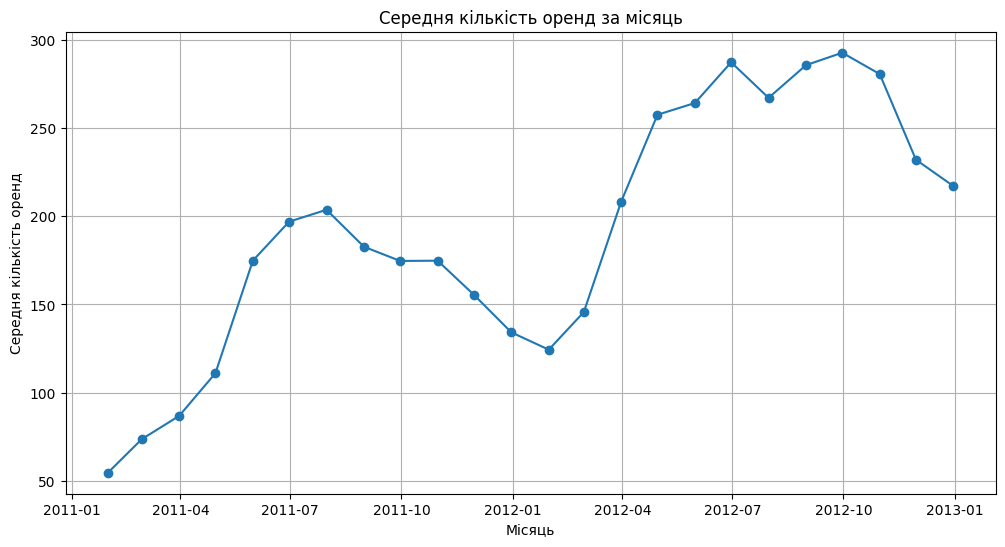

In [15]:
# with matplotlib
plt.figure(figsize=(12, 6))
plt.plot(monthly_count, 'o-')
plt.title('Середня кількість оренд за місяць')
plt.xlabel('Місяць')
plt.ylabel('Середня кількість оренд')
plt.grid(True)
plt.show()

**Мої спостереження:** Графіки між собою відрізняються відображенням дати і розмірної сітки: у matplotlib сітка і по горизонталі, і по вертикалі відображається, а у Pandas за замовченням - лише по горизонталі. Більш наглядний і інформативно привабливіший - це другий графік, побудований з matplotlib.
Проте, якщо порівнювати швидкість створення графіків, то, звичайно, Pandas зі своїми автоматичними налаштуваннями швидше побудує графік і код буде мати набагато менше рядочків, ніж в matplotlib.

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [16]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень 1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень 2

In [17]:
import numpy as np

x = days
y1 = sales_week1
y2 = sales_week2

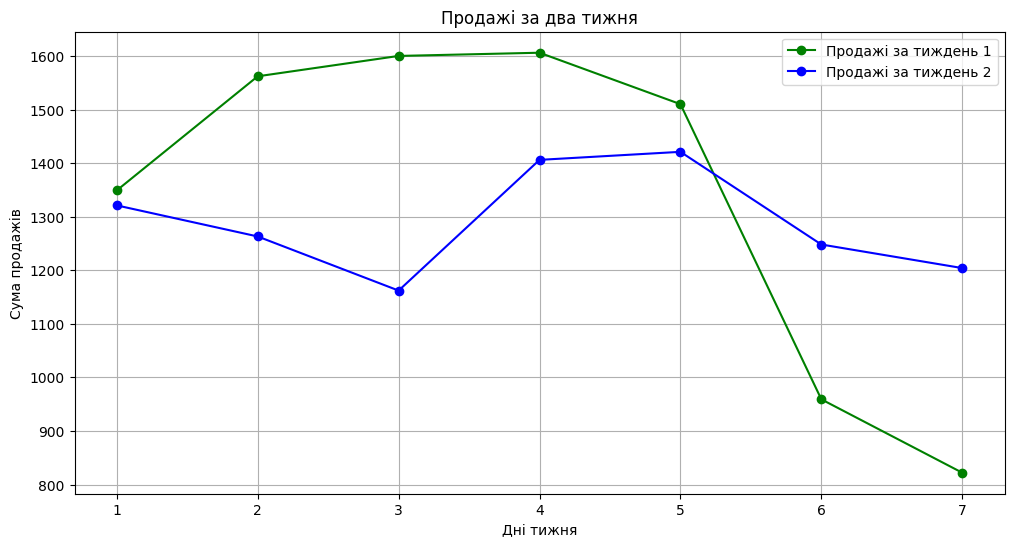

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(x, y1, 'o-', label='Продажі за тиждень 1', color='green')
plt.plot(x, y2, 'o-', label='Продажі за тиждень 2', color='blue')
plt.title('Продажі за два тижня')
plt.xlabel('Дні тижня')
plt.ylabel('Сума продажів')
plt.grid(True)
plt.legend()

plt.show()

**Відповіді на питання**
1. Судячи з графіку, в тиждень 2 проодажі були стабільніші: лінія на графіку, яка відповідає продажам за тиждень 2 проходить більш рівномірно.
2. Щоб прикріпити свій висновок по п.1 запитань, обчислимо стандартне відхилення для обох наборів даних по продажам за кожен тиждень: як відомо, чим менше значення стандартного відхилення, тим стабільнніші продажі. Нижче наведено обчислення стандартних відхилень.
   Отже, в результаті обчислень, підтвердилось припущення, зроблене в п.1 - продажі стабільніші були на тижні 2.

In [19]:
# Обчислимо стандартне відхилення для обох наборів даних по продажам за тиждень 1 і тиждень 2:
print("Стандартне відхилення для тижня 1:", round(np.std(sales_week1), 4))
print("Стандартне відхилення для тижня 2:", round(np.std(sales_week2), 4))

Стандартне відхилення для тижня 1: 299.9986
Стандартне відхилення для тижня 2: 90.9061


## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за сезонами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

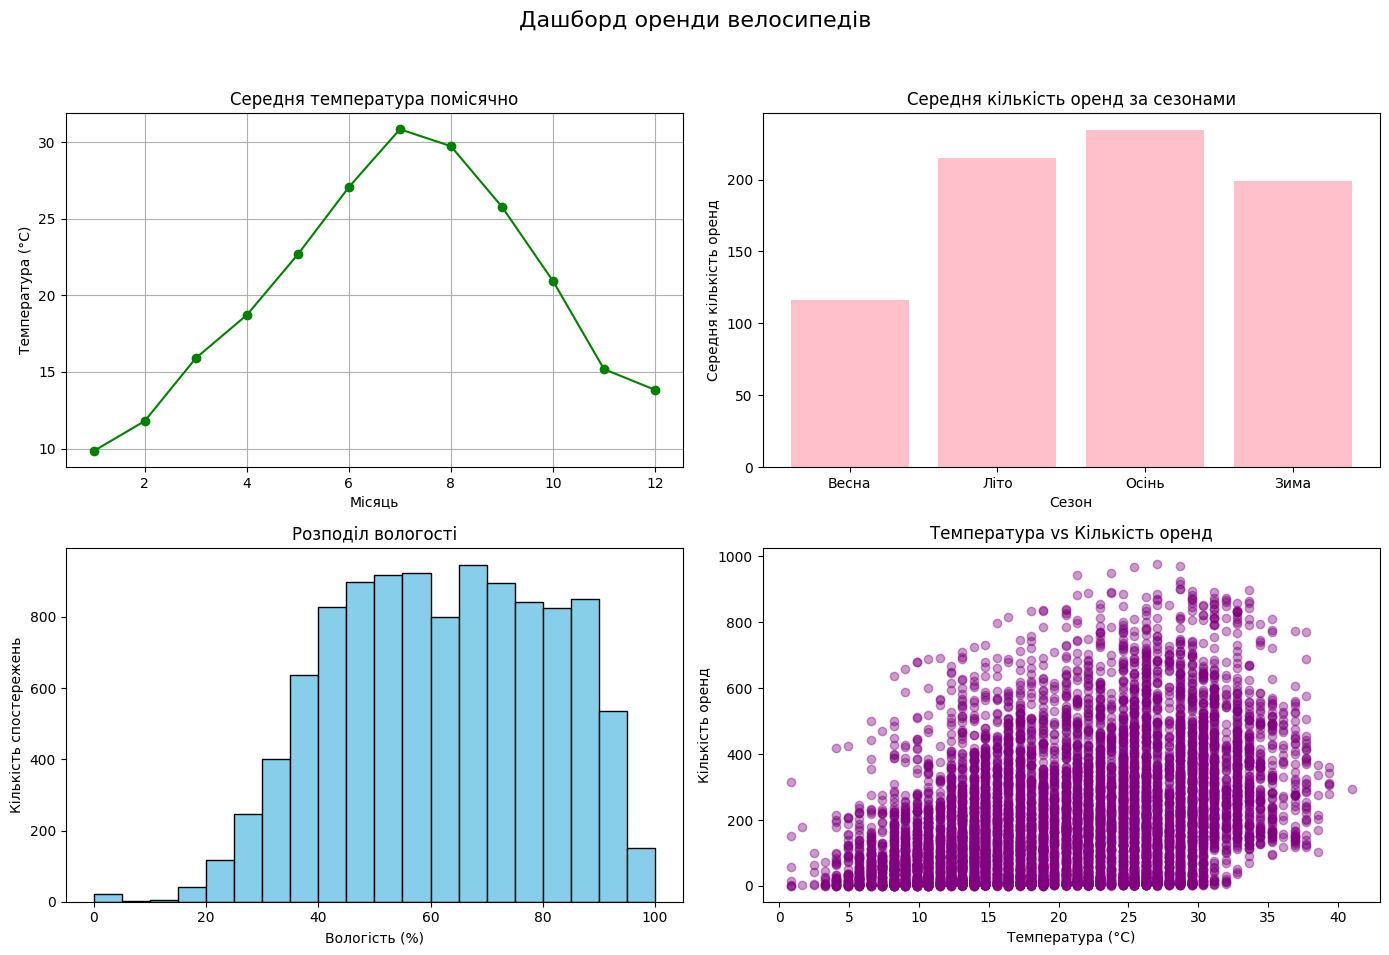

In [20]:
# Середня температура помісячно
monthly_temp = df.groupby('month')['temp'].mean()
# Середня кількість оренд за сезонами (годинна середня)
season_hourly_avg = df.groupby('season')['count'].mean()
# Температура vs кількість оренд
x_temp = df['temp']
y_count = df['count']

# Побудова сітки 2x2
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Дашборд оренди велосипедів', fontsize=16)

# 1. Лінійний графік середньої температури помісячно
axs[0, 0].plot(monthly_temp.index, monthly_temp.values, marker='o', linestyle='-', color='green')
axs[0, 0].set_title('Середня температура помісячно')
axs[0, 0].set_xlabel('Місяць')
axs[0, 0].set_ylabel('Температура (°C)')
axs[0, 0].grid(True)

# 2. Стовпчикова діаграма оренд за сезонами 
season_labels = {1: 'Весна', 2: 'Літо', 3: 'Осінь', 4: 'Зима'}
axs[0, 1].bar(
    [season_labels[s] for s in season_hourly_avg.index],
    season_hourly_avg.values,
    color='pink'
)
axs[0, 1].set_title('Середня кількість оренд за сезонами')
axs[0, 1].set_xlabel('Сезон')
axs[0, 1].set_ylabel('Середня кількість оренд')

# 3. Гістограма вологості
axs[1, 0].hist(df['humidity'], bins=20, color='skyblue', edgecolor='black')
axs[1, 0].set_title('Розподіл вологості')
axs[1, 0].set_xlabel('Вологість (%)')
axs[1, 0].set_ylabel('Кількість спостережень')

# 4. Scatter plot: температура vs кількість оренд
axs[1, 1].scatter(x_temp, y_count, alpha=0.4, color='purple')
axs[1, 1].set_title('Температура vs Кількість оренд')
axs[1, 1].set_xlabel('Температура (°C)')
axs[1, 1].set_ylabel('Кількість оренд')

# Покращення вигляду
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

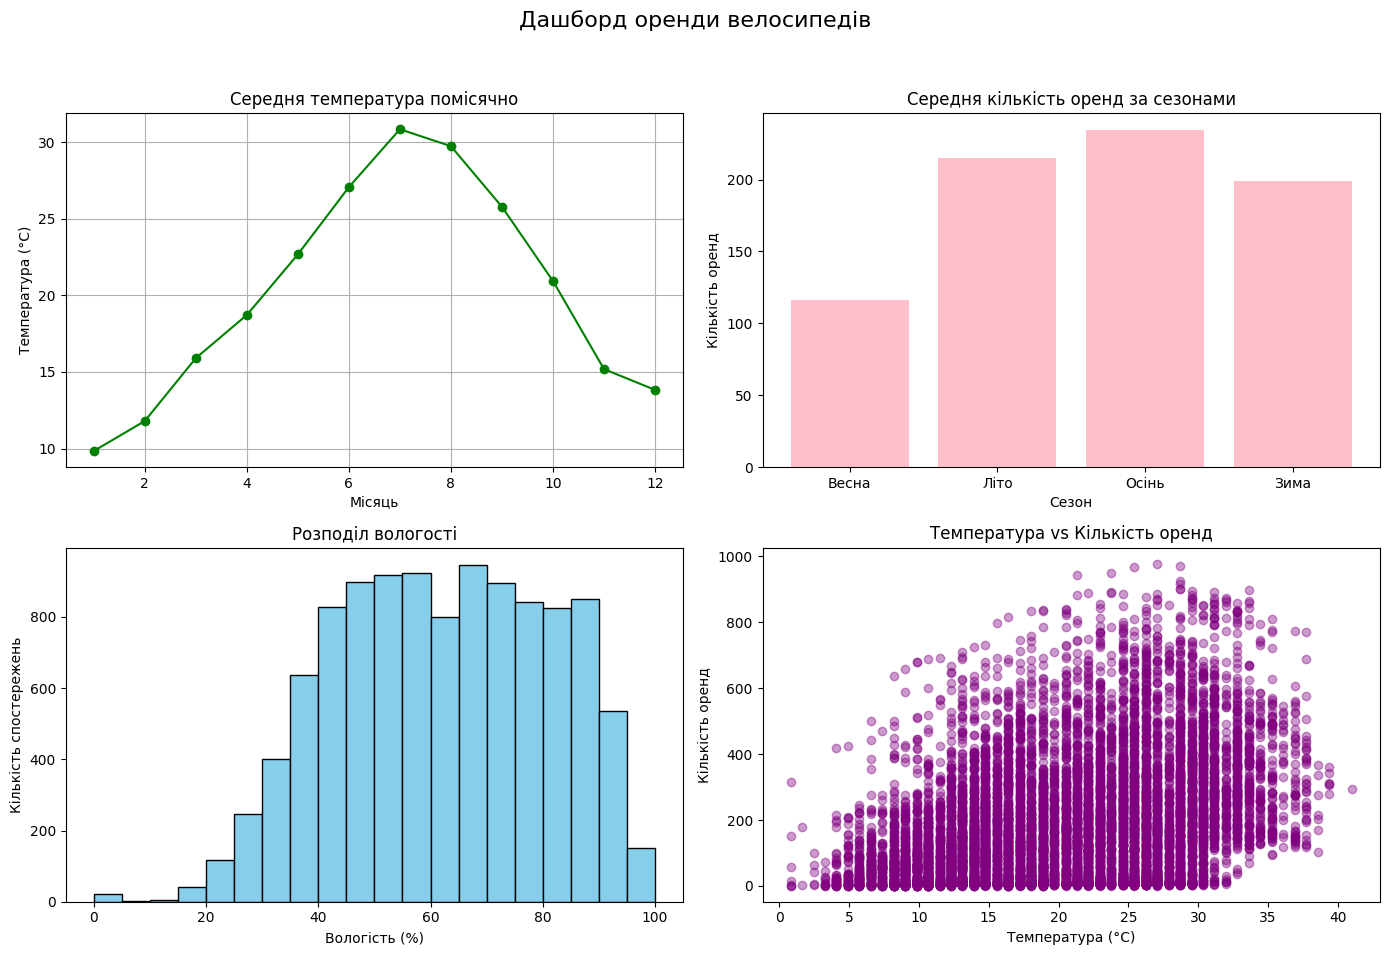

In [21]:
season_labels = {1: 'Весна', 2: 'Літо', 3: 'Осінь', 4: 'Зима'}
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Дашборд оренди велосипедів', fontsize=16)

# 1. Лінійний графік температури помісячно
ax[0, 0].plot(monthly_temp.index, monthly_temp.values, marker='o', linestyle='-', color='green')
ax[0, 0].set_title('Середня температура помісячно')
ax[0, 0].set_xlabel('Місяць')
ax[0, 0].set_ylabel('Температура (°C)')
ax[0, 0].grid(True)

# 2. Стовпчиковий графік за сезонами
ax[0, 1].bar([season_labels[s] for s in season_hourly_avg.index], season_hourly_avg.values, color='pink')
ax[0, 1].set_title('Середня кількість оренд за сезонами')
ax[0, 1].set_xlabel('Сезон')
ax[0, 1].set_ylabel('Кількість оренд')

# 3. Гістограма вологості
ax[1, 0].hist(df['humidity'], bins=20, color='skyblue', edgecolor='black')
ax[1, 0].set_title('Розподіл вологості')
ax[1, 0].set_xlabel('Вологість (%)')
ax[1, 0].set_ylabel('Кількість спостережень')

# 4. Scatter plot температура vs оренда
ax[1, 1].scatter(x_temp, y_count, alpha=0.4, color='purple')
ax[1, 1].set_title('Температура vs Кількість оренд')
ax[1, 1].set_xlabel('Температура (°C)')
ax[1, 1].set_ylabel('Кількість оренд')

# Автоматичне вирівнювання
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Відповідь на питання**
- При використанні plt.subplot() кожен графік додається окремо. Це зручно для простих випадків, коли потрібно шкидко побудувати один-два графіка для кращого розуміння розподілу даних.
- plt.subplots() створює одразу сітку графіків, де кожен підграфік — це об’єкт. При цьому підході побудови графіків зручно керувати стилями, підписами та структурою.
Отже, plt.subplots() краще підходить для дашбордів та складних візуалізацій, бо дає більше контролю над осями.

## Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

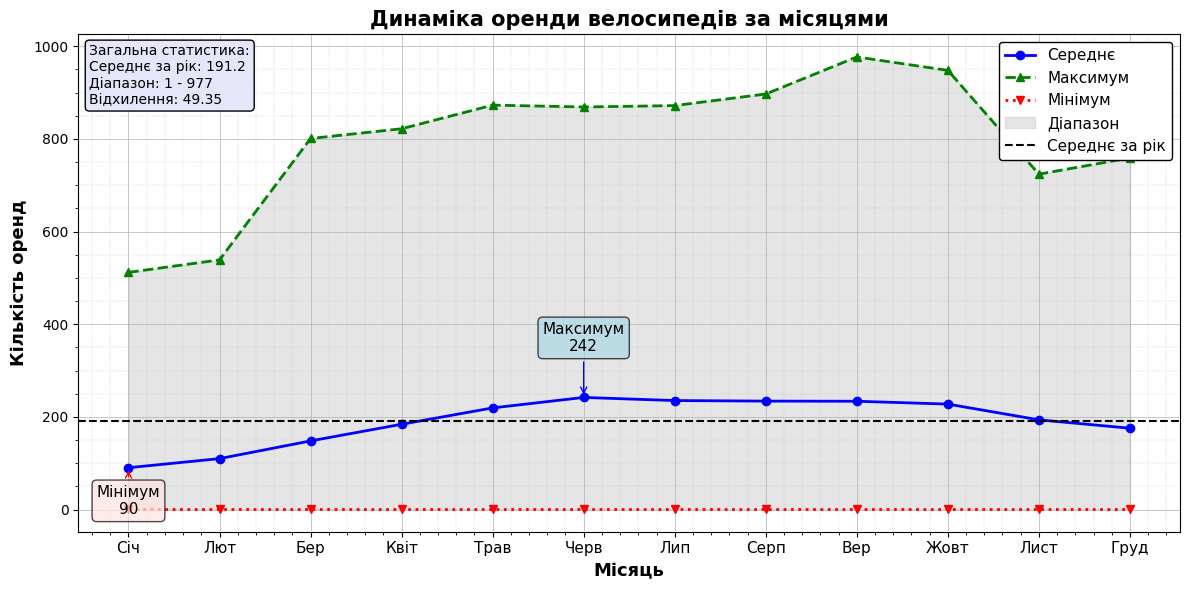

In [22]:
# Обчислення статистик по місяцях
monthly_stats = df.groupby('month')['count'].agg(['mean', 'min', 'max'])

# Значення для побудови графіка
months = np.arange(1, 13)
mean_values = monthly_stats['mean'].values
min_values = monthly_stats['min'].values
max_values = monthly_stats['max'].values
year_mean = mean_values.mean() # Середнє значення за рік
year_std = mean_values.std() # Стандартне відхиленн
ukr_months = ['Січ', 'Лют', 'Бер', 'Квіт', 'Трав', 'Черв',
              'Лип', 'Серп', 'Вер', 'Жовт', 'Лист', 'Груд'] # Назви місяців українською

# Побудова графіка
fig, ax = plt.subplots(figsize=(12, 6))

# Лінії середнього, мінімуму та максимуму
ax.plot(months, mean_values, 'bo-', label='Середнє', linewidth=2)
ax.plot(months, max_values, 'g^--', label='Максимум', linewidth=2)
ax.plot(months, min_values, 'rv:', label='Мінімум', linewidth=2)

# Заливка між мінімумом і максимумом
ax.fill_between(months, min_values, max_values, color='gray', alpha=0.2, label='Діапазон')

# Горизонтальна лінія середнього за рік
ax.axhline(year_mean, color='black', linestyle='--', linewidth=1.5, label='Середнє за рік')

# Анотація найвищого середнього значення
max_idx = months[np.argmax(mean_values)]
max_val = mean_values.max()
ax.annotate(f'Максимум\n{max_val:.0f}',
            xy=(max_idx, max_val), xytext=(max_idx, max_val + 100),
            arrowprops=dict(arrowstyle='->', color='blue'),
            bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue', alpha=0.7),
            ha='center', fontsize=11)

# Анотація найнижчого середнього значення
min_idx = months[np.argmin(mean_values)]
min_val = mean_values.min()
ax.annotate(f'Мінімум\n{min_val:.0f}',
            xy=(min_idx, min_val), xytext=(min_idx, min_val - 100),
            arrowprops=dict(arrowstyle='->', color='red'),
            bbox=dict(boxstyle="round,pad=0.3", facecolor='mistyrose', alpha=0.7),
            ha='center', fontsize=11)

# Основна та допоміжна сітка
ax.grid(True, which='major', linestyle='-', linewidth=0.5)
ax.minorticks_on()
ax.grid(True, which='minor', linestyle=':', linewidth=0.3)

# Оформлення осей
ax.set_xticks(months)
ax.set_xticklabels(ukr_months, fontsize=11)
ax.set_xlabel('Місяць', fontsize=13, fontweight='bold')
ax.set_ylabel('Кількість оренд', fontsize=13, fontweight='bold')

# Заголовок
ax.set_title('Динаміка оренди велосипедів за місяцями', fontsize=15, fontweight='bold')

# Стилізована легенда з тінню
legend = ax.legend(loc='upper right', fontsize=11, frameon=True)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_alpha(1.0)

# Текстовий блок зі статистикою
overall_min = df['count'].min()
overall_max = df['count'].max()
stats_text = '\n'.join([
    'Загальна статистика:',
    f'Середнє за рік: {year_mean:.1f}',
    f'Діапазон: {overall_min:.0f} - {overall_max:.0f}',
    f'Відхилення: {year_std:.2f}'
])
props = dict(boxstyle='round', facecolor='lavender', edgecolor='black', alpha=1)
ax.text(0.01, 0.98, stats_text, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='left', bbox=props)

# Збереження графіка 
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

**Відповіді на питання для інтерпретації:**
1. Анотації привертають увагу до ключових моментів, таких як максимум або мінімум, роблять графік інформативнішим без потреби аналізувати всі дані вручну.
2. Функція fill_between() створює заповнену область між двома кривими (мінімумом і максимумом), візуально виділяє діапазон варіації значень, наочно демонструє коливання кількості оренд у кожному місяці.
3. Текстовий блок узагальнює важливі статистичні показники (середнє, відхилення, діапазон), дозволяє швидко оцінити загальні тренди, не вчитуючись у графік, дуже корисний під час презентацій або звітів.